In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas.plotting import radviz
import matplotlib
matplotlib.style.use('ggplot')
from subprocess import check_output

%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/user/FLI/data/flights.csv")
data.head(100)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Total_delay = data['ARRIVAL_DELAY'].sum()
Total_rows = len(data.index)

print(Total_delay / Total_rows)

6.005984011968024


In [114]:
df = data.loc[(data['AIR_SYSTEM_DELAY'] != False, ['ARRIVAL_DELAY'])]

delays_airsys = data.loc[(data['AIR_SYSTEM_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
notdelayed_airsys = data.loc[(data['AIR_SYSTEM_DELAY'] <= 0, ['ARRIVAL_DELAY'])].sum()

count_sys = df[(data['AIR_SYSTEM_DELAY'] != False)].count()
count_sys_pos = data.loc[(data['AIR_SYSTEM_DELAY'] > 0, ['ARRIVAL_DELAY'])].count()

df = data.loc[(data['SECURITY_DELAY'] != False, ['ARRIVAL_DELAY'])]

delays_airsec = data.loc[(data['SECURITY_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
notdelayed_airsec = data.loc[(data['SECURITY_DELAY'] <= 0, ['ARRIVAL_DELAY'])].sum()

count_sec = df[(data['SECURITY_DELAY'] != False)].count()
count_sec_pos = data.loc[(data['SECURITY_DELAY'] > 0, ['ARRIVAL_DELAY'])].count()

df = data.loc[(data['AIRLINE_DELAY'] != False, ['ARRIVAL_DELAY'])]

delays_airair = data.loc[(data['AIRLINE_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
notdelayed_airair = data.loc[(data['AIRLINE_DELAY'] <= 0, ['ARRIVAL_DELAY'])].sum()

count_air = df[(data['AIRLINE_DELAY'] != False)].count()
count_air_pos = data.loc[(data['AIRLINE_DELAY'] > 0, ['ARRIVAL_DELAY'])].count()
df = data.loc[(data['LATE_AIRCRAFT_DELAY'] != False, ['ARRIVAL_DELAY'])]

delays_airlate = data.loc[(data['LATE_AIRCRAFT_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
notdelayed_airlate = data.loc[(data['LATE_AIRCRAFT_DELAY'] <= 0, ['ARRIVAL_DELAY'])].sum()

count_late = df[(data['LATE_AIRCRAFT_DELAY'] != False)].count()
count_late_pos = data.loc[(data['LATE_AIRCRAFT_DELAY'] > 0, ['ARRIVAL_DELAY'])].count()

df = data.loc[(data['WEATHER_DELAY'] != False, ['ARRIVAL_DELAY'])]

delays_airweather = data.loc[(data['WEATHER_DELAY'] > 0, ['ARRIVAL_DELAY'])].sum()
notdelayed_airweather = data.loc[(data['WEATHER_DELAY'] <= 0, ['ARRIVAL_DELAY'])].sum()

count_weather = df[(data['WEATHER_DELAY'] != False)].count()
count_weather_pos = data.loc[(data['WEATHER_DELAY'] > 0, ['ARRIVAL_DELAY'])].count()
delays=[]
only_delays=[]
system = (delays_airsys + notdelayed_airsys) / count_sys
security = (delays_airsec + notdelayed_airsec) / count_sec
airline = (delays_airair + notdelayed_airair) / count_air

weather = (delays_airweather + notdelayed_airweather) / count_weather


system_pos = delays_airsys / count_sys_pos
security_pos = delays_airsec / count_sec_pos
airline_pos = delays_airair / count_air_pos

weather_pos = delays_airweather / count_weather_pos


delays.append(system)
delays.append(security)
delays.append(airline)

delays.append(weather)

only_delays.append(system_pos)
only_delays.append(security_pos)
only_delays.append(airline_pos)

only_delays.append(weather_pos)
print(delays)
print(only_delays)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[ARRIVAL_DELAY    13.476579
dtype: float64, ARRIVAL_DELAY    15.549329
dtype: float64, ARRIVAL_DELAY    13.625229
dtype: float64, ARRIVAL_DELAY    15.263379
dtype: float64]
[ARRIVAL_DELAY    56.008545
dtype: float64, ARRIVAL_DELAY    45.646465
dtype: float64, ARRIVAL_DELAY    60.141552
dtype: float64, ARRIVAL_DELAY    86.011191
dtype: float64]


Text(0.5,1,'All Delays')

<Figure size 1440x576 with 0 Axes>

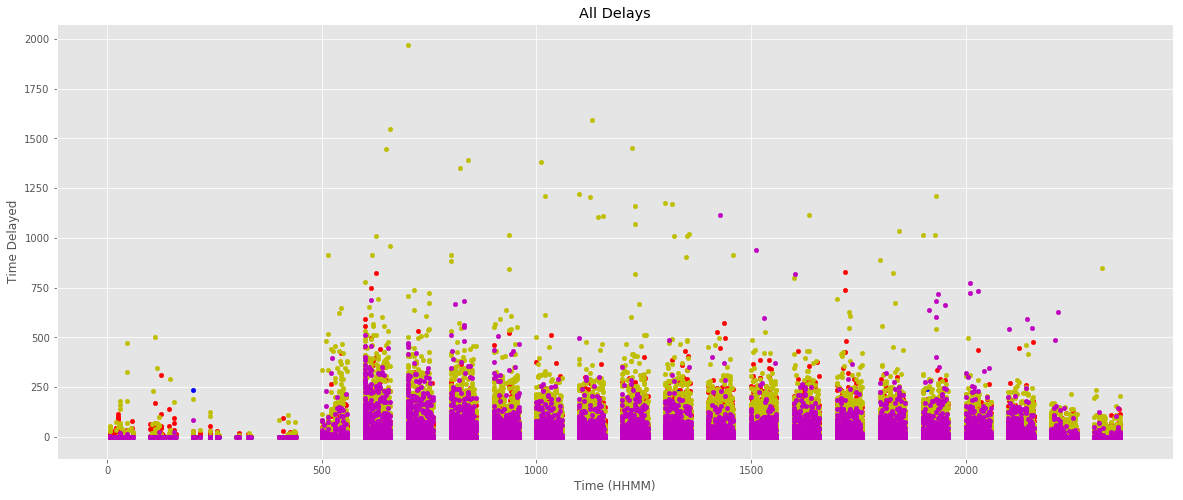

In [115]:


plt.figure(figsize=(20, 8))




ax1 = data.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='AIR_SYSTEM_DELAY',figsize=(20,8), color='r')
ax2 = data.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='SECURITY_DELAY', color='b', ax=ax1)
ax3 = data.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='AIRLINE_DELAY', color='y', ax=ax1)
ax5 = data.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='WEATHER_DELAY', color='m', ax=ax1)




ax1.set_xlabel("Time (HHMM)")
ax1.set_ylabel("Time Delayed")
plt.title('All Delays')

Text(0.5,1,'Air System Delays')

<Figure size 1440x576 with 0 Axes>

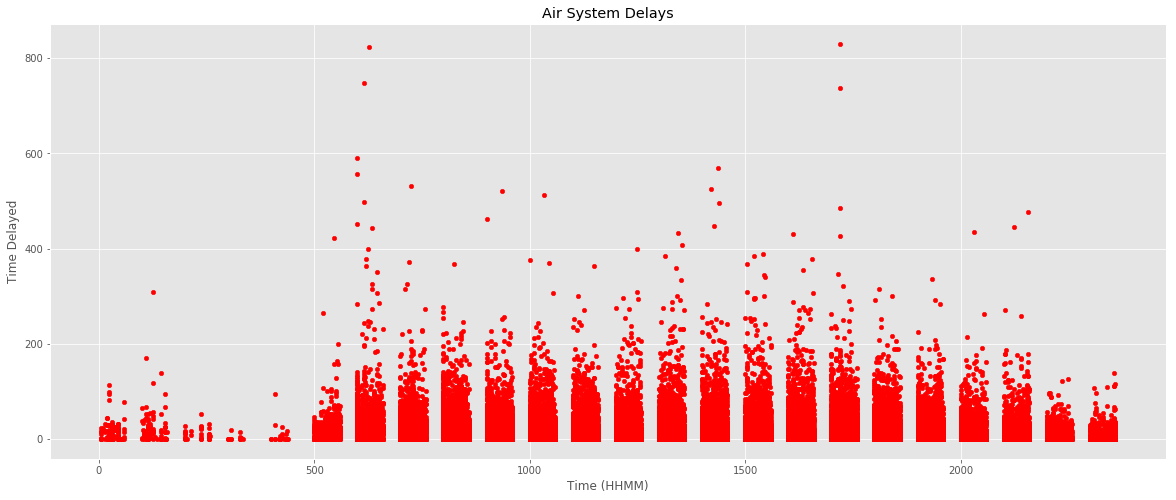

In [108]:
plt.figure(figsize=(20, 8))
ax1 = data.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='AIR_SYSTEM_DELAY', figsize=(20,8), color='r')
ax1.set_xlabel("Time (HHMM)")
ax1.set_ylabel("Time Delayed")
plt.title('Air System Delays')

Text(0.5,1,'Security Delays')

<Figure size 1440x576 with 0 Axes>

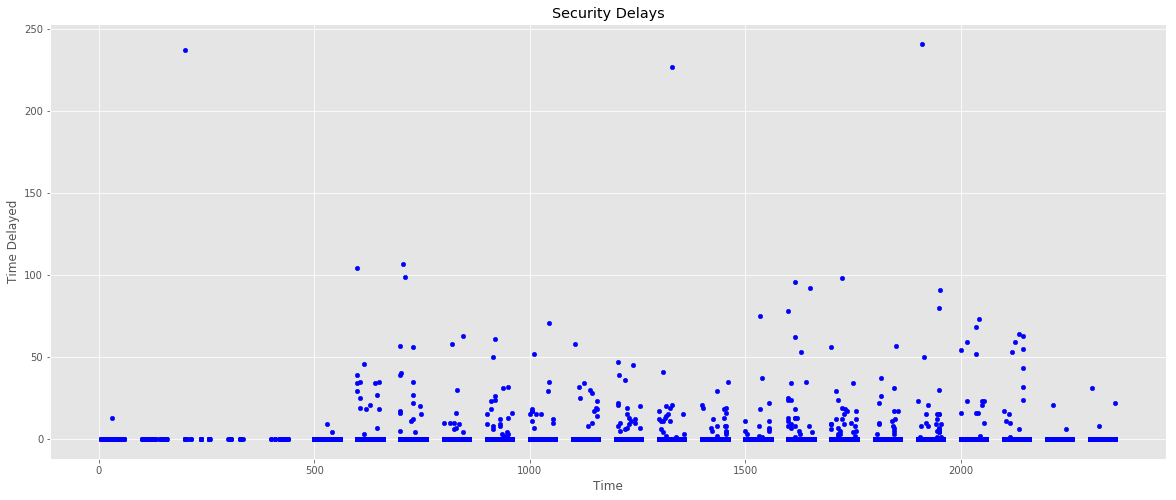

In [109]:
plt.figure(figsize=(20, 8))
ax1 = data.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='SECURITY_DELAY', figsize=(20,8), color='b')
ax1.set_xlabel("Time")
ax1.set_ylabel("Time Delayed")
plt.title('Security Delays')

Text(0.5,1,'Carrier Delays')

<Figure size 1440x576 with 0 Axes>

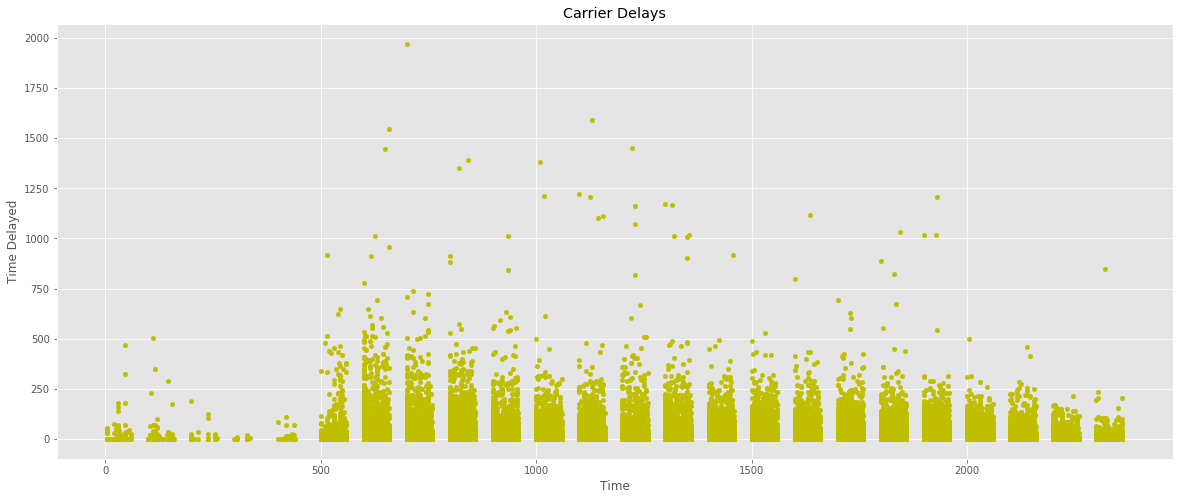

In [110]:
plt.figure(figsize=(20, 8))
ax1 = data.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='AIRLINE_DELAY', figsize=(20,8), color='y')
ax1.set_xlabel("Time")
ax1.set_ylabel("Time Delayed")
plt.title('Carrier Delays')

Text(0.5,1,'Weather Delays')

<Figure size 1440x576 with 0 Axes>

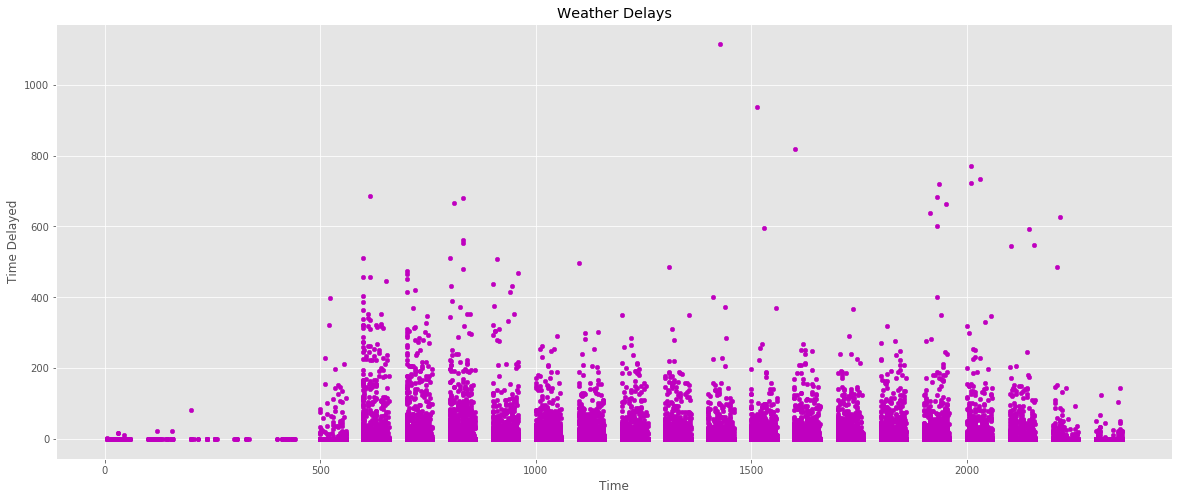

In [111]:
plt.figure(figsize=(20, 8))
ax1 = data.plot(kind='scatter', x='SCHEDULED_DEPARTURE', y='WEATHER_DELAY', figsize=(20,8), color='m')
ax1.set_xlabel("Time")
ax1.set_ylabel("Time Delayed")
plt.title('Weather Delays')

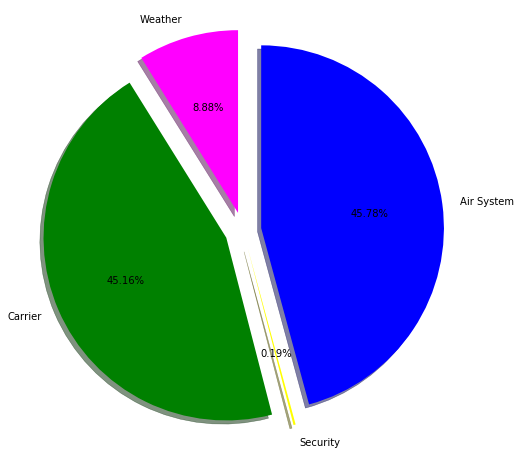

In [113]:

labels = 'Weather', 'Carrier', 'Security', 'Air System'
sizes = [delays_airweather,  delays_airair, delays_airsec, delays_airsys]
explode = (0.1, 0.1, 0.1, 0.1)
colors=['magenta','green','yellow','blue']

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, colors=colors,labels=labels, autopct='%1.2f%%',
        shadow=True, explode=explode, startangle=90, center=(0,0))
ax1.axis('equal')


plt.show()